<a href="https://colab.research.google.com/github/mrozgurer/Bank-Loan-Project/blob/main/Bank-Loan-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV # It is used for hyperparameter tuning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Loan_Modelling.csv')
loan=data.copy()

In [ ]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# First, let's look at the dimensions of the dataset

# f-string is a new feature in the newest version of Python, and it allows you to modify strings by plugging in functions, methods etc. in curved brackets

print(f'There are {loan.shape[0]} rows and {loan.shape[1]} columns in the dataset')

#The output shows that it is not a very huge dataset.

There are 5000 rows and 14 columns in the dataset


In [ ]:
# I will drop ID, because it is not a meaningful variable for analysis

loan.drop('ID', axis=1, inplace=True)

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [ ]:
np.random.seed(1) #This code allows you to generate the same 15 random rows, when it is set up to 1 (only 1 seed -or set of random values)
loan.sample(15) # df.sample() allows you to generate a specific number of random rows from the dataset, so you do not restrict yourself with the first 5 or last 5 rows which sometimes tend to be biased

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,31,5,84,91320,1,2.90,3,105,0,0,0,0,1
4767,35,9,45,90639,3,0.90,1,101,0,1,0,0,0
3814,34,9,35,94304,3,1.30,1,0,0,0,0,0,0
3499,49,23,114,94550,1,0.30,1,286,0,0,0,1,0
2735,36,12,70,92131,3,2.60,2,165,0,0,0,1,0
3922,31,4,20,95616,4,1.50,2,0,0,0,0,1,0
2701,50,26,55,94305,1,1.60,2,0,0,0,0,1,0
1179,36,11,98,90291,3,1.20,3,0,0,1,0,0,1
932,51,27,112,94720,3,1.80,2,0,0,1,1,1,1
792,41,16,98,93117,1,4.00,3,0,0,0,0,0,1


In [ ]:
# I will check for the missing values

loan.isnull().sum() # There are no missing values

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
# I will make ZIPCode categorical and see how many unique categories there are.

loan['ZIPCode']=pd.Categorical(loan['ZIPCode'])

In [ ]:
loan.info() # As we see, dtype of ZIPCode has become category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   int64   
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   int64   
 9   Securities_Account  5000 non-null   int64   
 10  CD_Account          5000 non-null   int64   
 11  Online              5000 non-null   int64   
 12  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(11)
memory usage: 498.5 KB


In [ ]:
loan['ZIPCode'].nunique()

467

**DECISION:** ZIPCode will be dropped, because there are hundreds of unique categories in it, which would distort the analysis, especially when dummy variables are created. Although ZIPCode can be a useful indicator of many statistics such as socioeconomic status or education level, other variables in the dataset like Income and Education can provide the same information, so there will no loss of important data when we drop ZIPCode.

In [ ]:
loan.drop('ZIPCode', axis=1, inplace=True)

In [ ]:
# Although each variable in the dataset includes numbers, some of those numbers in fact refer to categories. Therefore, I will need to change their data type to categorical.


loan[['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']]=loan[['Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']].astype('category')

In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   int64   
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(5)
memory usage: 264.5 KB


**ORDERING:** I will not order the numbers in any of the categorical variables, because ordering will not make sense. For example, I will not order the variable Education, because I do not know if Advanced/Professional category represented by 3 is a lower than Graduate which is represented by 2 or higher than that. Graduate can include Master or PhD, and if that is PhD, then I do not think that Advanced/Professional education would be higher than that, because the highest education is PhD. There is an ambiguity in the variable, so better be safe than sorry. 

Instead, I will create dummy variables for each categorical variable. 

In [ ]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


#Univariate Analysis and Data Preprocessing#

##Mortgage##

In [ ]:
loan['Mortgage'].nunique()

347

In [ ]:
loan['Mortgage'].value_counts()

0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: Mortgage, Length: 347, dtype: int64

In [ ]:
loan['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

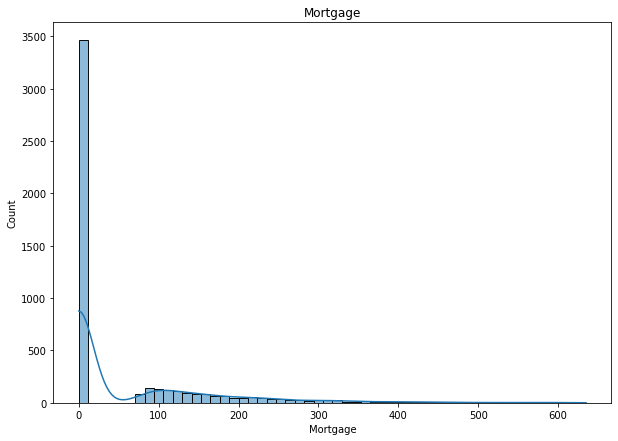

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Mortgage', kde=True)
plt.title('Mortgage')
plt.show();

In [ ]:
loan['Mortgage'].skew() # It is highly skewed. 

2.1040023191079444

###Transformations: Comparison###

In [ ]:
loan['Mortgage_log']=np.log(loan['Mortgage']+1)

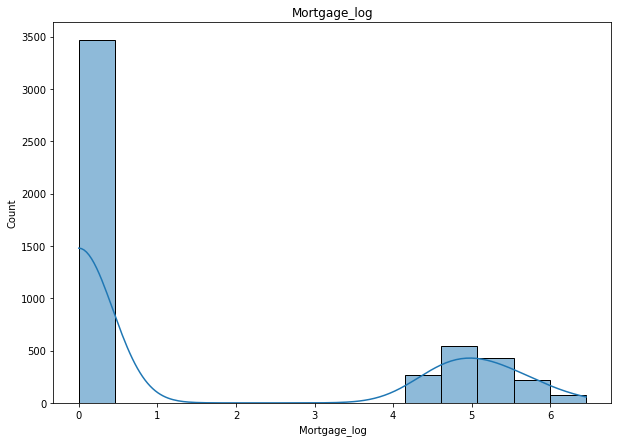

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Mortgage_log', kde=True)
plt.title('Mortgage_log')
plt.show();

In [ ]:
loan['Mortgage_log'].skew()

0.8766882783607729

In [ ]:
loan['Mortgage_sqrt']=np.sqrt(loan['Mortgage'])

In [ ]:
loan['Mortgage_sqrt'].skew()

1.1509108564079351

In [ ]:
loan['Mortgage_arcsin']=np.arcsinh(loan['Mortgage'])

In [ ]:
loan['Mortgage_arcsin'].skew()

0.8675822511635507

**DECISION**: Arcsinh transformation reduced skewness slightly more than log transformation, but because log transformation is a more popular, simpler and easy-to-understand transformation, I will choose that. Square root transformation was the worst. 

In [ ]:
loan.drop(['Mortgage_sqrt', 'Mortgage_arcsin', 'Mortgage'], axis=1, inplace=True)

##Income##

In [ ]:
loan['Income'].skew()

0.8413386072610816

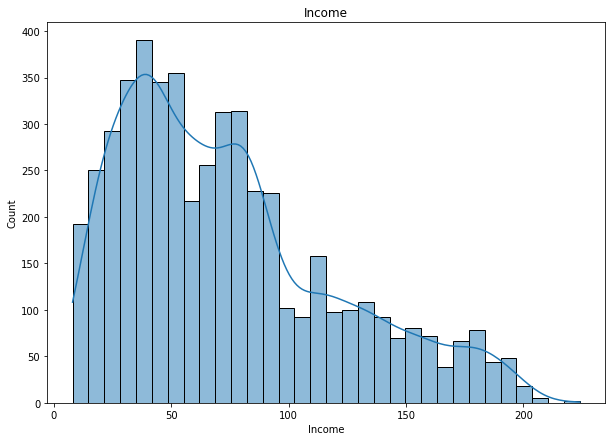

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Income', kde=True)
plt.title('Income')
plt.show();

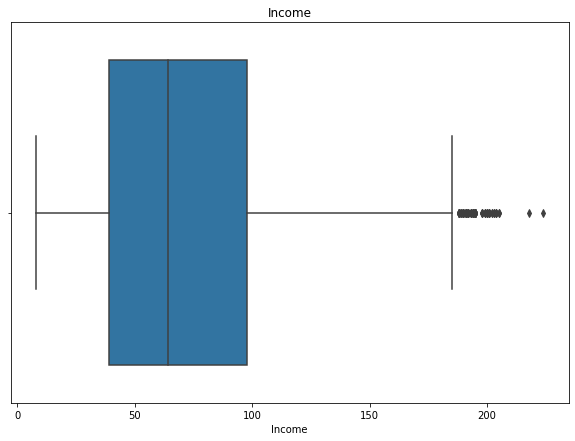

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Income')
plt.title('Income')
plt.show(); # There are outliers, but they are meaningful values, so I will not change them.

###Transformations: Comparison###

In [ ]:
loan['Income_log']=np.log(loan['Income'])

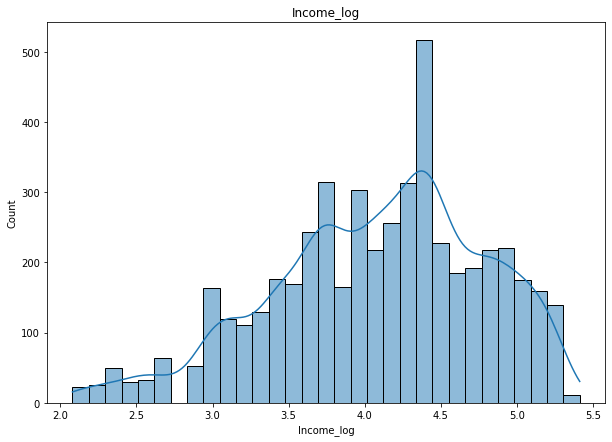

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Income_log', kde=True)
plt.title('Income_log')
plt.show();

In [ ]:
loan['Income_log'].skew()

-0.46050403395988815

In [ ]:
loan['Income_arcsin']=np.arcsinh(loan['Income'])
loan['Income_arcsin'].skew()

-0.45897787811778185

In [ ]:
loan['Income_sqrt']=np.sqrt(loan['Income'])

In [ ]:
loan['Income_sqrt'].skew()

0.26043573246879353

**DECISION**: Log transformation and arcsinh transformation had too great an effect, making the positively skewed distribution negatively skewed. Therefore, the square root of the data was used in the analysis. Also, the square root was more successful with reducing the skewness.



In [ ]:
loan.drop(['Income','Income_log','Income_arcsin'], axis=1, inplace=True)

##Age##

In [ ]:
loan['Age'].skew() #Normally distributed, so no need for transformation

-0.02934068151284029

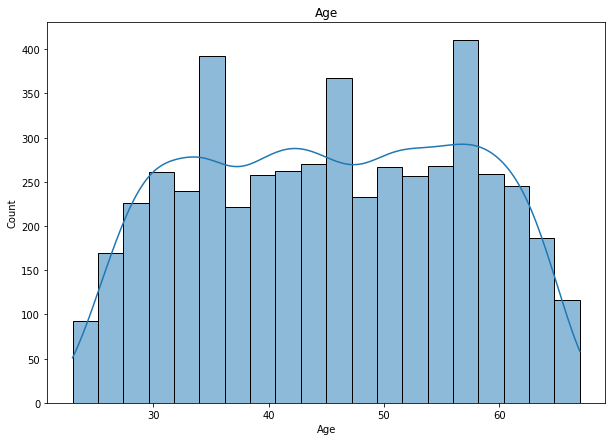

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Age', kde=True, bins=20)
plt.title('Age')
plt.show();

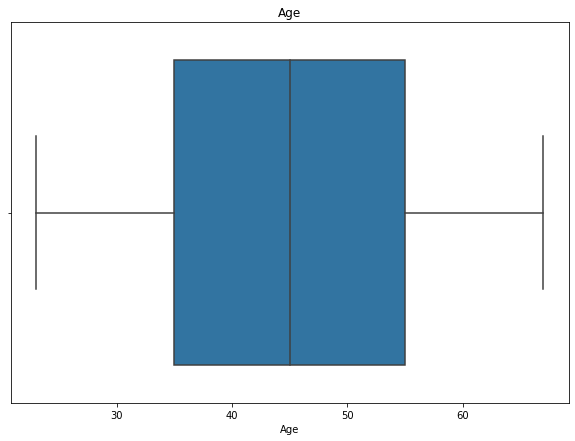

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Age')
plt.title('Age')
plt.show();

##Experience##

In [ ]:
loan['Experience'].skew() # Normally distributed, so no need for transformation

-0.026324688402384513

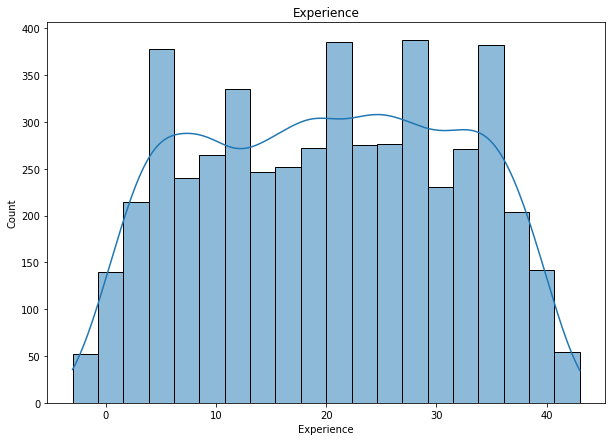

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Experience', kde=True)
plt.title('Experience')
plt.show();

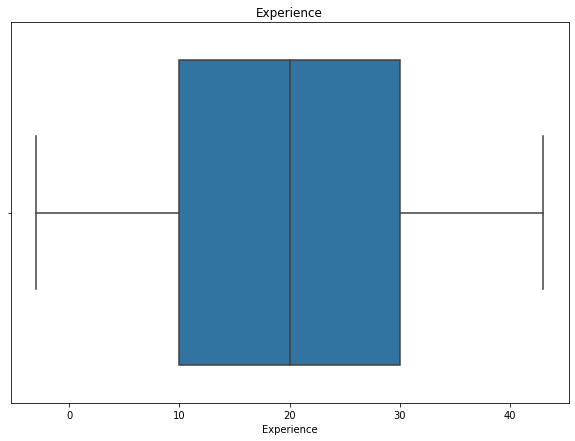

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Experience')
plt.title('Experience')
plt.show();

##Family##

In [ ]:
loan['Family'].skew() #Very slightly positively skewed, so I will not unnecessarily transform the data. Every transformation changes the data, so it should be used conservatively.

0.15522066944367582

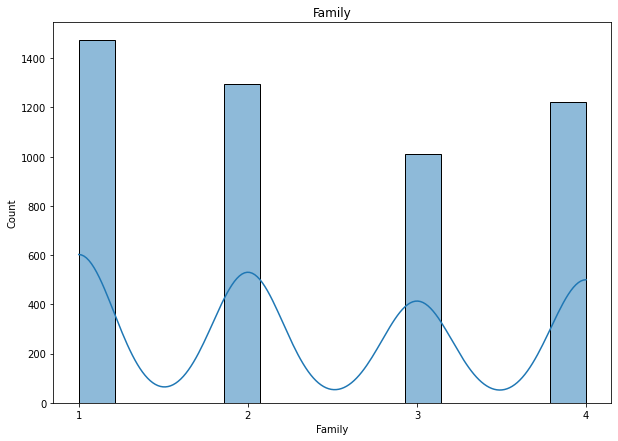

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Family', kde=True)
plt.title('Family')
plt.xticks(np.arange(1, 5, 1.0))
plt.show();

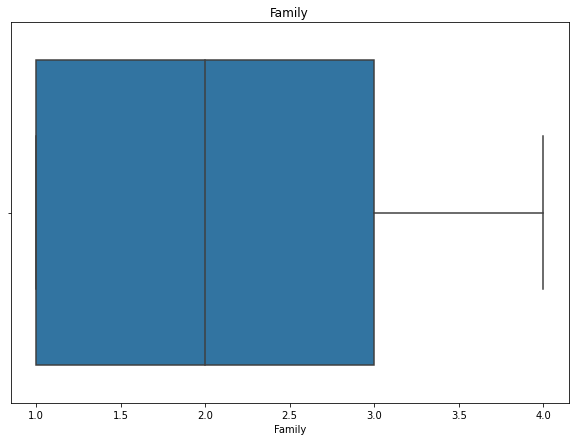

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Family')
plt.title('Family')
plt.show();

###Log transformation###

In [ ]:
loan['Family_log']=np.log(loan['Family'])

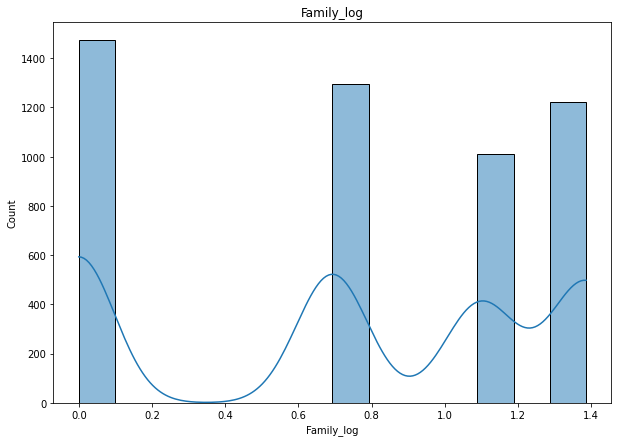

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Family_log', kde=True)
plt.title('Family_log')
plt.show();

In [ ]:
loan['Family_log'].skew()

-0.2844533630481354

###Arcsin Transformation###

In [ ]:
loan['Family_arcsin']=np.arcsinh(loan['Family'])

In [ ]:
loan['Family_arcsin'].skew()

-0.19710466417349756

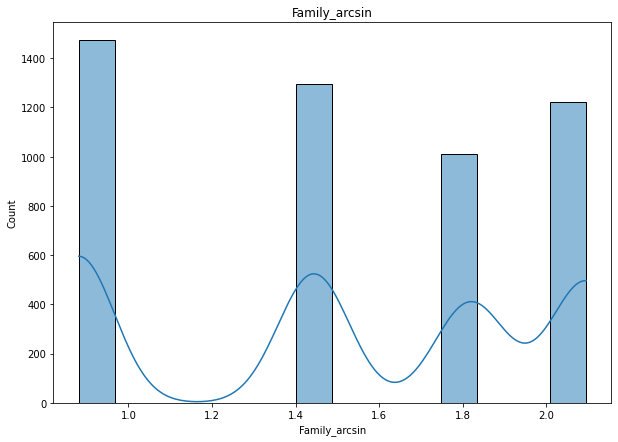

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Family_arcsin', kde=True)
plt.title('Family_arcsin')
plt.show();

###Square Root Transformation###

In [ ]:
loan['Family_sqrt']=np.sqrt(loan['Family'])

In [ ]:
loan['Family_sqrt'].skew()

-0.0658675567129915

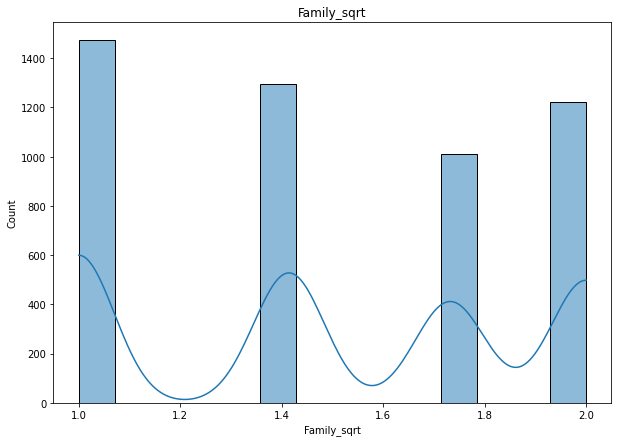

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='Family_sqrt', kde=True)
plt.title('Family_sqrt')
plt.show();

In [ ]:
loan.drop(['Family_log','Family_arcsin','Family'], axis=1, inplace=True);

In [ ]:
loan.head()

,Age,Experience,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_log,Income_sqrt,Family_sqrt
0,25,1,1.6,1,0,1,0,0,0,0.0,7.000000,2.000000
1,45,19,1.5,1,0,1,0,0,0,0.0,5.830952,1.732051
2,39,15,1.0,1,0,0,0,0,0,0.0,3.316625,1.000000
3,35,9,2.7,2,0,0,0,0,0,0.0,10.000000,1.000000
4,35,8,1.0,2,0,0,0,0,1,0.0,6.708204,2.000000


##CC Average##

In [ ]:
loan['CCAvg'].skew()

1.5984433366678663

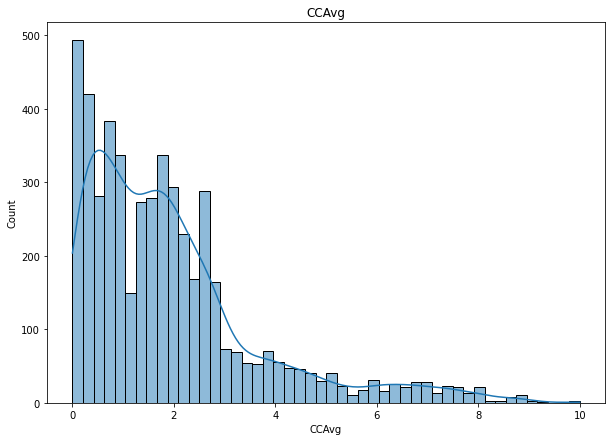

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='CCAvg', kde=True)
plt.title('CCAvg')
plt.show();

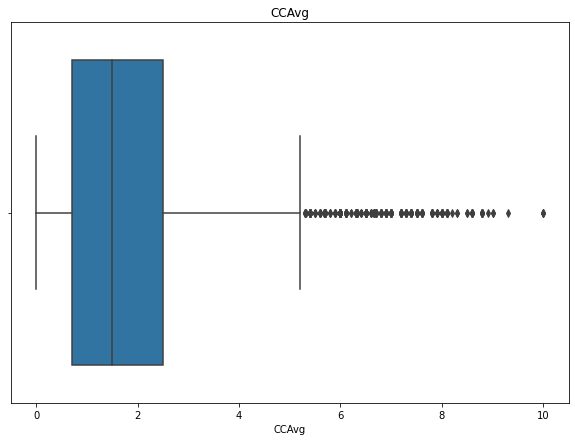

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='CCAvg')
plt.title('CCAvg')
plt.show(); # There are outliers, but they are meaningful values, so I will not change them.

In [ ]:
loan['CCAvg_log']=np.log(loan['CCAvg']+1)

In [ ]:
loan['CCAvg_log'].skew()

0.31922379644464305

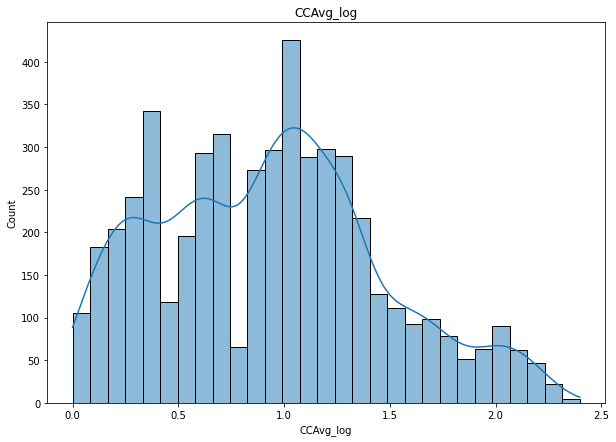

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='CCAvg_log', kde=True)
plt.title('CCAvg_log')
plt.show();

In [ ]:
loan['CCAvg_arcsin']=np.arcsinh(loan['CCAvg'])

In [ ]:
loan['CCAvg_arcsin'].skew()

0.22875335913625006

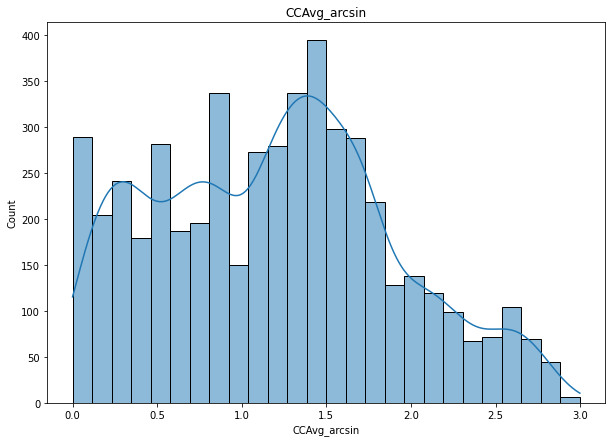

In [ ]:
plt.figure(figsize=(10,7))
sns.histplot(data=loan, x='CCAvg_arcsin', kde=True)
plt.title('CCAvg_arcsin')
plt.show();

In [ ]:
loan['CCAvg_sqrt']=np.sqrt(loan['CCAvg'])

In [ ]:
loan['CCAvg_sqrt'].skew()

0.424026404519258

**DECISION:** Although I normally prefer log transformation over arcsinh, because it is simpler and more understandable, I will choose arcsinh transformation here, because it is way better than log transformation in reducing skewness for this variable. Square root is the worst, so I just ignore it.  

In [ ]:
loan.drop(['CCAvg_log','CCAvg', 'CCAvg_sqrt'], axis=1, inplace=True)

In [ ]:
loan.head()

,Age,Experience,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_log,Income_sqrt,Family_sqrt,CCAvg_arcsin
0,25,1,1,0,1,0,0,0,0.0,7.000000,2.000000,1.248983
1,45,19,1,0,1,0,0,0,0.0,5.830952,1.732051,1.194763
2,39,15,1,0,0,0,0,0,0.0,3.316625,1.000000,0.881374
3,35,9,2,0,0,0,0,0,0.0,10.000000,1.000000,1.719052
4,35,8,2,0,0,0,0,1,0.0,6.708204,2.000000,0.881374


##Education##

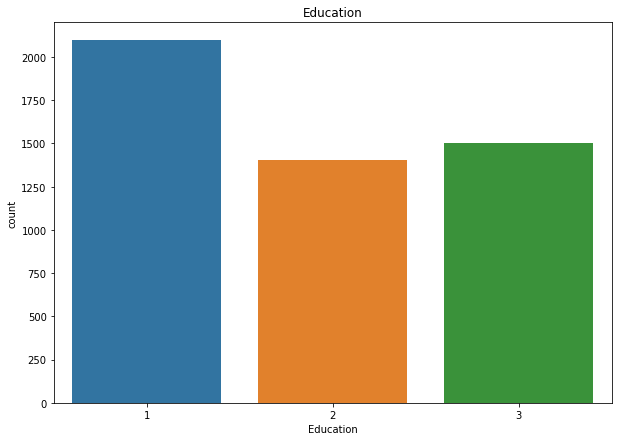

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Education')
plt.title('Education')
plt.show();

In [ ]:
loan['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

**Observation:** Although the number of people who have undergrad degree is higher than those with grad or advanced/professional degree, there is not a significant difference between them, especially between grad and advanced/professional.

##Securities Account##

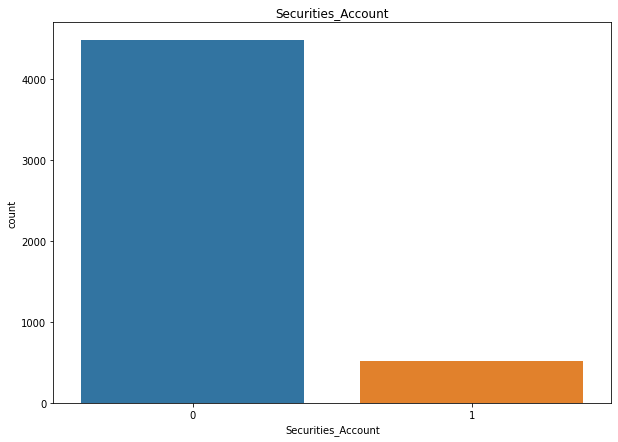

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Securities_Account')
plt.title('Securities_Account')
plt.show();

In [ ]:
loan['Securities_Account'].value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

**Observation:** Only 5% of the customers have securities account, meaning that most of the customers do not have securities (e.g., bond, option, stock) kept in AllLife Bank. However, that does not mean that they do not have securities account in other banks. We do not have that information.

#Bivariate Analysis#

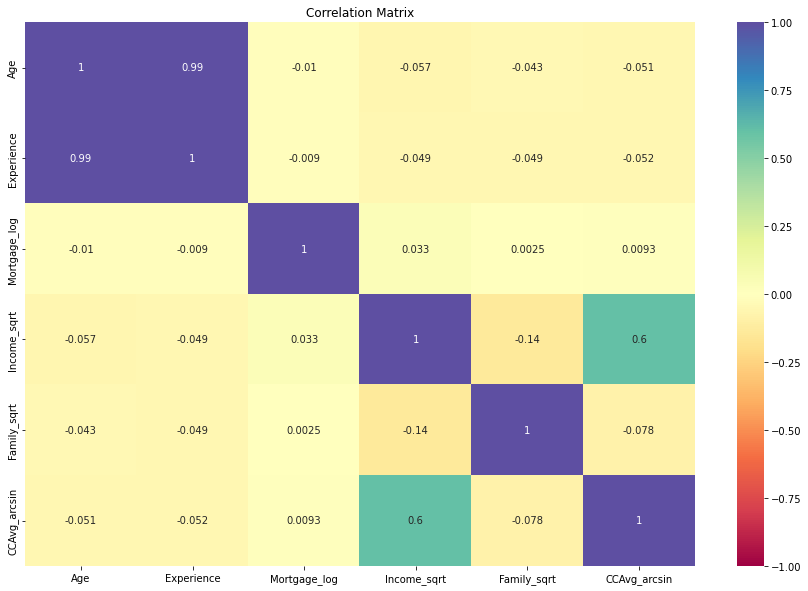

In [ ]:
# Let's first create a correlation matrix and heatmap to see the correlation between each numerical variables

plt.figure(figsize=(15,10))
sns.heatmap(loan.corr(), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# data.corr() gives the correlation of the data (the strength and the direction of the correlation)
# annot=True writes the value of each correlation inside the cells of the correlation matrix
# vmin=-1, vmax=1 makes your graph between -1 and 1, because a correlation value cannot be less than -1 and more than 1. 

**Observations on the correlation matrix:** There is moderate to high positive correlation between Income_sqrt and CCAvg_arcsin (or simply one's income and  average spending on credit cards per month). Other correlational values are very low, so I ignore them. 

**Multicollinearity:** However, there is a huge positive correlation between Experience and Age, meaning that there might be a multicollinearity issue. Multicollinearity happens when two variable correlate with each other extremely, which lead to interpretability issues, because multicollinearity prevents us from knowing how much a variable contributes to the result. On the other hand, I cannot know if it is really multicollinearity just by looking at a correlation matrix. To know it for sure, I should calculate variance inflation factor (VIF).

In [ ]:
# Calculating VIF for numerical variables

import statsmodels.api as sm #It imports the necessary package
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = loan[list(loan[['Age','Experience', 'Mortgage_log','Income_sqrt','Family_sqrt','CCAvg_arcsin']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,107.968674,Age
1,37.504638,Experience
4,16.205264,Family_sqrt
3,15.883528,Income_sqrt
5,6.161731,CCAvg_arcsin
2,1.439043,Mortgage_log


**DECISION:** Normally, variables higher than VIF score of 5 are considered having multicollinearity. However, some statisticians say that it can be as high as 10, before claiming that a variable has multicollinearity issue. The findings above show that Age is extremely above 10. Although Experience, Family size, and Income is above 10 as well, those number can go down, when Age is dropped. Therefore, I will drop Age and rerun VIF analysis.

In [ ]:
loan.drop('Age', axis=1, inplace=True)


In [ ]:
Y = loan[list(loan[['Experience', 'Mortgage_log','Income_sqrt','Family_sqrt','CCAvg_arcsin']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(Y.values, i) for i in range(Y.shape[1])]
vif_info['Column'] = Y.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,12.079363,Income_sqrt
3,6.942038,Family_sqrt
4,6.161529,CCAvg_arcsin
0,3.546345,Experience
1,1.428211,Mortgage_log


**DECISION:** As expected, VIF scores of Income, Experience, and Family has gone down considerably. However, Income is still above than 10 which is the most liberal cutoff value in the literature. Correlation matrix revealed that there is a moderate to high positive correlation between income and average spending on credit cards (CCAvg). Therefore, I assume that if one of them is dropped, the other will have a lower VIF. If I drop CCAvg, VIF of Income can drop below 10 or even 5. Therefore, I should decide which one to drop. I think that I should drop income, because how much money a person spends on credit cards monthly is a more important factor in deciding whether a bank should give that person a loan or not. Why? It is because a person can have a high income, but he can still use his credit cards irresponsibly, spending on them more than he earns. Although a better thing to do would be to create a column and calculate how many percent of monthly income was spent on credit cards, but I want to keep things simpler for the purposes of this project.  

In [ ]:
loan.drop('Income_sqrt', axis=1, inplace=True)

In [ ]:
Z = loan[list(loan[['Experience', 'Mortgage_log','Family_sqrt','CCAvg_arcsin']])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(Z.values, i) for i in range(Z.shape[1])]
vif_info['Column'] = Z.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,5.081842,Family_sqrt
0,3.395009,Experience
3,3.235783,CCAvg_arcsin
1,1.414424,Mortgage_log


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          5000 non-null   int64   
 1   Education           5000 non-null   category
 2   Personal_Loan       5000 non-null   category
 3   Securities_Account  5000 non-null   category
 4   CD_Account          5000 non-null   category
 5   Online              5000 non-null   category
 6   CreditCard          5000 non-null   category
 7   Mortgage_log        5000 non-null   float64 
 8   Family_sqrt         5000 non-null   float64 
 9   CCAvg_arcsin        5000 non-null   float64 
dtypes: category(6), float64(3), int64(1)
memory usage: 186.4 KB


##Personal Loan vs. Experience##

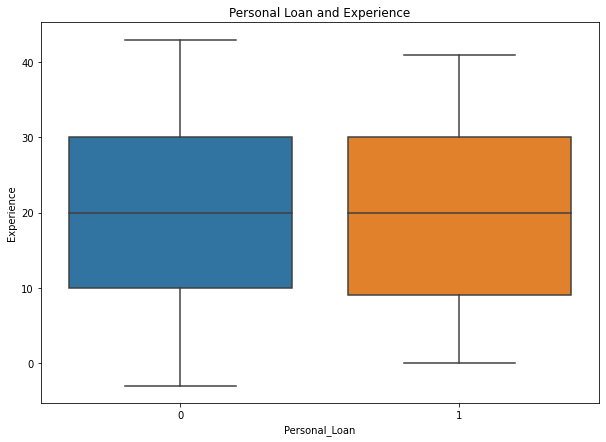

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Personal_Loan', y='Experience')
plt.title('Personal Loan and Experience')
plt.show();


**Observation:** Year of professional experience does not seem to have any effect on the possibility of purchasing a personal loan.

##Personal Loan vs. Mortgage##

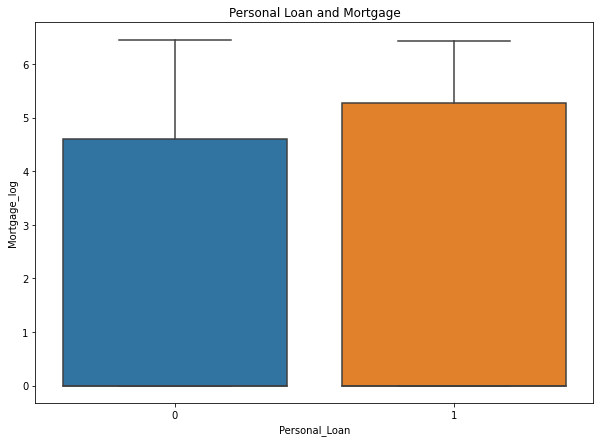

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Personal_Loan', y='Mortgage_log')
plt.title('Personal Loan and Mortgage')
plt.show();

**Observation:** Value of house mortgage does not seem to create much difference in the possibility of purchasing a loan.

##Personal Loan vs. Family Size##

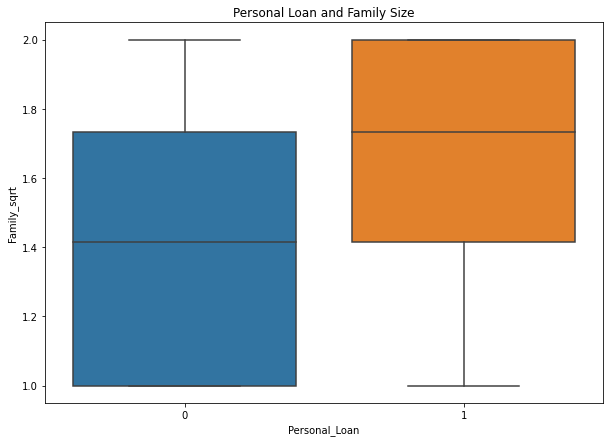

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Personal_Loan', y='Family_sqrt')
plt.title('Personal Loan and Family Size')
plt.show();

**Observation:** People with larger families tend to purchase personal loan, possibly because larger families may have more needs or emergency situations that would lead them to purchase loan.

##Personal Loan vs. Spending on Credit Cards##

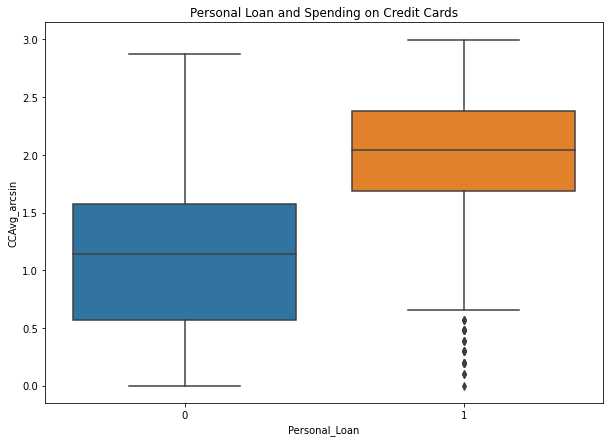

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=loan, x='Personal_Loan', y='CCAvg_arcsin')
plt.title('Personal Loan and Spending on Credit Cards')
plt.show();

**Observation:** People who spend more on credit cards monthly are more likely to purchase loans.

##Personal Loan vs. Education##

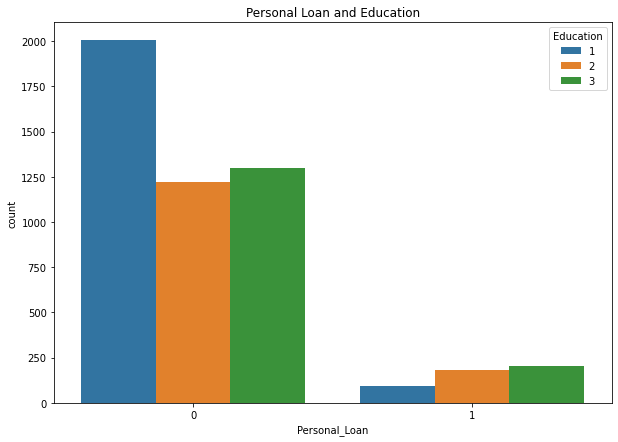

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Personal_Loan', hue='Education')
plt.title('Personal Loan and Education')
plt.show();

**Observation:** People with undergrad degrees purchase loan less compared to those with graduate and advanced degrees.

##Personal loan vs. Securities Account##

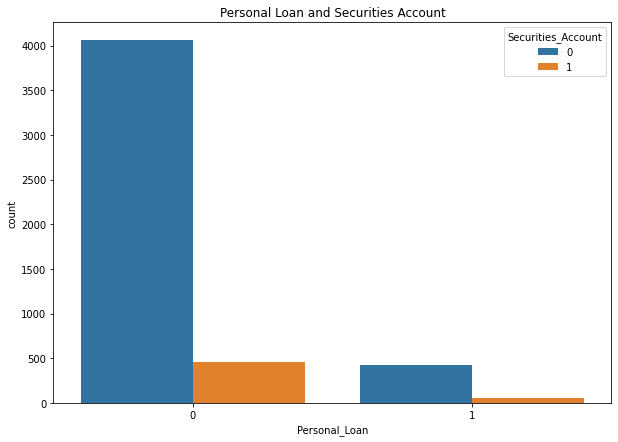

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Personal_Loan', hue='Securities_Account')
plt.title('Personal Loan and Securities Account')
plt.show();

**Observation:** It seems that having a securities account does not have an effect on the possibility of purchasing a loan, because the difference between those who have the account and those who have not is almost the same in both groups of those who purchase the loan and those who do not. 

##Personal loan vs. CD_Account##

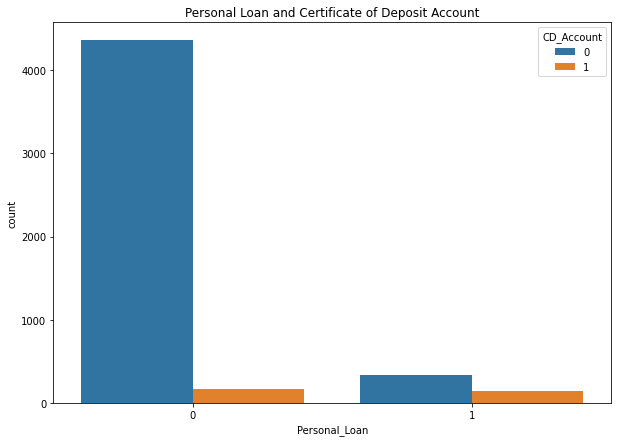

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Personal_Loan', hue='CD_Account')
plt.title('Personal Loan and Certificate of Deposit Account')
plt.show();

**Observations:** It is the same as securities account above.

##Personal loan vs. Online##

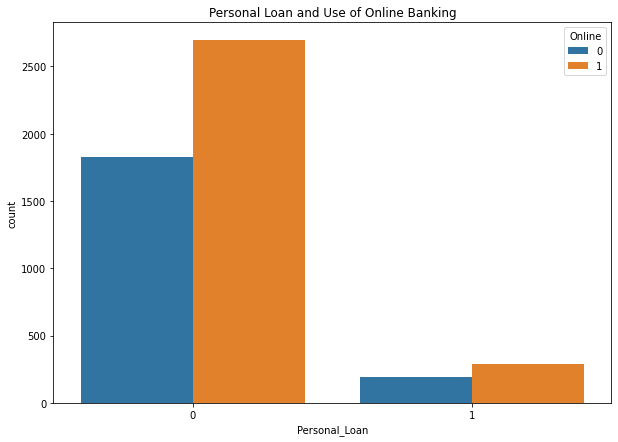

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Personal_Loan', hue='Online')
plt.title('Personal Loan and Use of Online Banking')
plt.show();

**Observation:** It is the same as the two plots above. The difference and relation between two categorical variables is the same in each group. Use of internet facilities do not have an impact on purchasing personal loan.

##Personal loan vs. Credit Card##

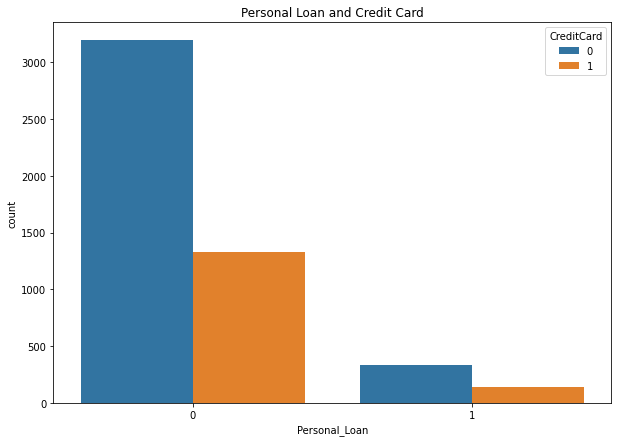

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=loan, x='Personal_Loan', hue='CreditCard')
plt.title('Personal Loan and Credit Card')
plt.show();

**Observation:** Again, the difference is almost the same in each group. Having a credit card from another bank does not seem to have an effect on purchasing personal loan.

#How are we going to evaluate the model?#

The model I am going to build can make a wrong prediction in the following ways:

1- The model can predict that a customer will purchase the loan, but in fact, he will not purchase it (False Positive)

2- The model can predict a customer will not purchase the loan, but in fact, he will purchase it (False Negative)

Which loss is greater?

The second loss is greater, because the aim of the bank is to identify customers who will purchase the loan, expand the loan business, and gain more interest through loans. On the other hand, there is not much loss in the first wrong prediction, because there is no cost or risk for wrongly identifying a customer as a potential loan-purchaser. The bank will just make a loan offer to the customer, and the customer, in turn, will accept it or not. If the customer is wrongly identified as a loan-purchaser, he will simply refuse the offer. At the end, there is very few risk or cost because of wrong identification in the case of false positive. But, as I said, there is much risk for the second wrong prediction (false negative), because the bank fails to detect the customers who will help them raise their profits by purchasing a loan. This decision is valid for both logistic regression and decision tree, because the same problem and the dataset will be used in both analyses. 

How can we reduce the loss resulting from false negatives? The probability of false negatives is reduced by increasing Recall score which is (TP/(TP+FN), meaning that as True Positive (hence, Recall) increases, False Negative decreases.

First, we should write two functions, one for calculating metrics (e.g., Accuracy, Recall), the other for calculating confusion matrix (e.g., the matrix that shows the performance of the model on a contingency table.

In [ ]:
# First, I will create a function to calculate the metrics

def compute_metrics(model, predictors, target, threshold=0.5): # target is the outcome variable, predictors are the independent variables

    # I use predictors to predict based on the threshold of 0.5
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

# I will compute different types of metrics to measure and compare the performance of the model

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred) 
    precision = precision_score(target, pred) 
    f1 = f1_score(target, pred) 

# I want to create a dataframe that includes the metrics

    loan_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return loan_perf

In [ ]:
# Now, I will create a function that will compute the confusion matrix

def confusion_matrix_loan(model, predictors, target, threshold=0.5):
    
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2) # This is to create the percentage labels for each metric in each cell of the confusion matrix

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Encoding Categorical Variables##

In [ ]:
# I will create dummies for each categorical variable except the target variable Personal_Loan

pd.get_dummies(loan, columns=['Education','Securities_Account','CD_Account','Online','CreditCard'], drop_first=True)


,Experience,Personal_Loan,Mortgage_log,Family_sqrt,CCAvg_arcsin,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,1,0,0.000000,2.000000,1.248983,0,0,1,0,0,0
1,19,0,0.000000,1.732051,1.194763,0,0,1,0,0,0
2,15,0,0.000000,1.000000,0.881374,0,0,0,0,0,0
3,9,0,0.000000,1.000000,1.719052,1,0,0,0,0,0
4,8,0,0.000000,2.000000,0.881374,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,3,0,0.000000,1.000000,1.397998,0,1,0,0,1,0
4996,4,0,4.454347,2.000000,0.390035,0,0,0,0,1,0
4997,39,0,0.000000,1.414214,0.295673,0,1,0,0,0,0
4998,40,0,0.000000,1.732051,0.481212,1,0,0,0,1,0


##Splitting the Data##

In [ ]:
# Identifying the X and Y variables

X = loan.drop("Personal_Loan", axis=1)
Y = loan["Personal_Loan"]

In [ ]:
# Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Logistic Regression#

In [ ]:
# I will use newton-cg solver, because it does a better job while analyzing high-dimensional data.

model = LogisticRegression(solver="newton-cg", random_state=1)
lg = model.fit(X_train, y_train) # This code creates the model. 

##Finding the coefficients##

In [ ]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=["coef"]).T

,Experience,Education,Securities_Account,CD_Account,Online,CreditCard,Mortgage_log,Family_sqrt,CCAvg_arcsin
coef,-0.000555,0.898934,-1.245947,3.429909,-0.411806,-0.971069,0.056017,1.054916,2.312576


**Interpretation:**

Coefficients of Mortgage, Family Size, Average Spending on Credit Cards and some categorical levels of Education and Credit Card account are positive, meaning that each unit of increase in them predicts an increase in chances of a customer purchase a loan when offered.

On the other hand, coefficients of Experience and some categorical levels of Securities Account, Using Online Banking, and Credit Card (having the credit card of other banks) is negative, meaning that each unit of increase in them predicts a decrease in chances of a customer purchase a loan when offered.

##Confusion Matrix##

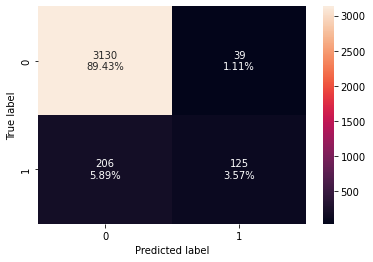

In [ ]:
# I will create the confusion matrix to check the performance on training set

confusion_matrix_loan(lg, X_train, y_train)

In [ ]:
# Now, I will see the metrics to check the performance on training set

log_reg_model_train_perf = compute_metrics(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.93,0.377644,0.762195,0.505051


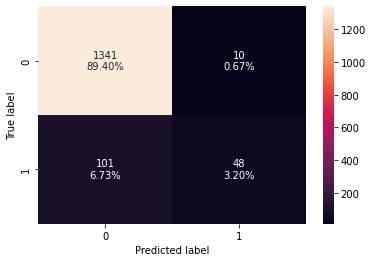

In [ ]:
# I will create the confusion matrix to check the performance on test set

confusion_matrix_loan(lg, X_test, y_test)

In [ ]:
# Now, I will see the metrics to check the performance on test set

log_reg_model_test_perf = compute_metrics(
    lg, X_test, y_test
)

print("Testing performance:")
log_reg_model_test_perf

Testing performance:


,Accuracy,Recall,Precision,F1
0,0.926,0.322148,0.827586,0.463768


**Observation:** Recall score is important to us, since we are looking the the rate of true positives. Recall score of training test (0.378) is close to the recall score of testing set (0.322), which seems good, but there might be an overfitting problem still. More importantly, recall score is very low in both sets. 

##ROC-AUC for Training and Testing Set##

ROC curve and the area under the curve (AUC) shows how good our model fits the data. Higher AUC means better fit. Therefore, we should look at ROC-AUC as well.

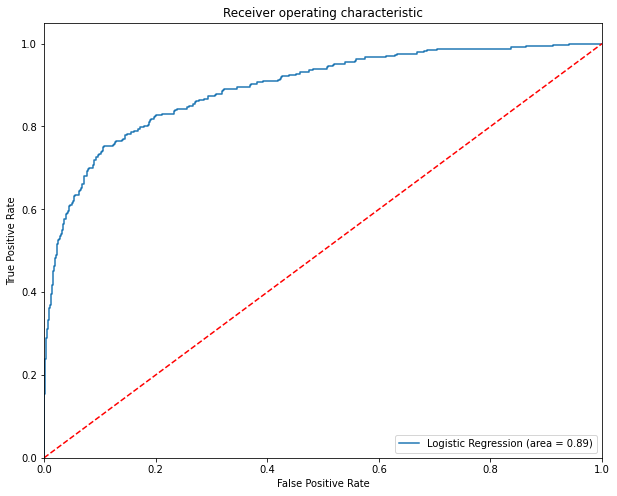

In [ ]:
# First, I will find the ROC-AUC score for the training set.

logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])  # The index 1 refers to the predicted probabilities of class 1 in the data

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1]) #This returns the false positive rate, true positive rate, and threshold values. Predict_proba computes the probabilities for class 0 and 1.


# The below is to plot ROC.

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

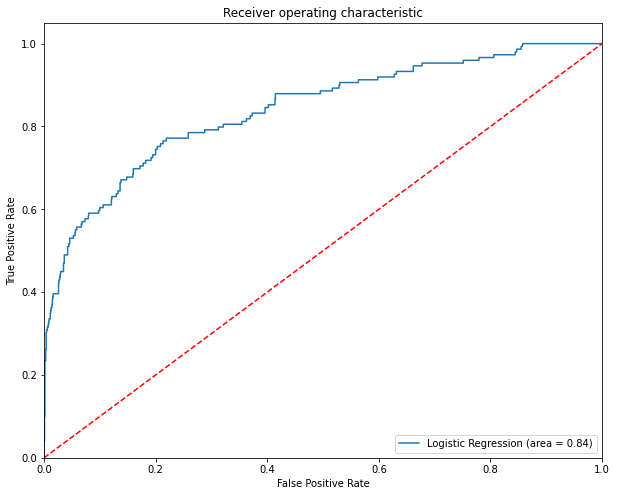

In [ ]:
# Second, I will find the ROC-AUC score for the testing set.

logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])

#Plotting

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observation:**AUC score is high in both training and testing, and the AUC score of training is relatively close to the AUC score of testing. However, again, there is the issue that recall score is very low, which should be handled properly.

##Improving the Model Performance for Training Set##

The reason behind low recall score might be the threshold value (0.5) we chose at the beginning. If the cost of False Negative is very high compared to False Positive, they we may want to choose a higher or lower threshold value. In other words, we can try to find out the optimal threshold value in ROC-AUC curve, represented by the point where true positive rate is high and false positive rate is low. Higher TPR means lower False Negative as I explained in more detail above.

In [ ]:
# The code below will return the optimal threshold

fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.15104177955296375


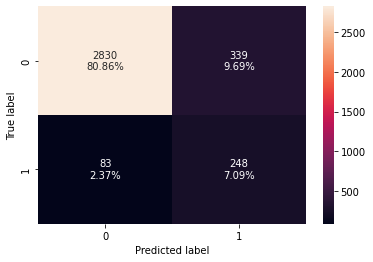

In [ ]:
# Now, I will rerun confusion matrix and metric values for both training and testing sets based on the optimal threshold value I have just found

confusion_matrix_loan(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_train_new = compute_metrics(lg, X_train, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_train_new

Training performance:


,Accuracy,Recall,Precision,F1
0,0.879429,0.749245,0.422487,0.540305


**Observation:** Recall score has drastically increased from 0.378 to .0.749 in training set, meaning that model performance has been improved significantly.

##Precision-Recall Curve for Training Set##

We can also use the Precision-Recall Curve to find an even more optimal threshold for recall. This curve reveals the tradeoff between recall and precision for different threshold values.

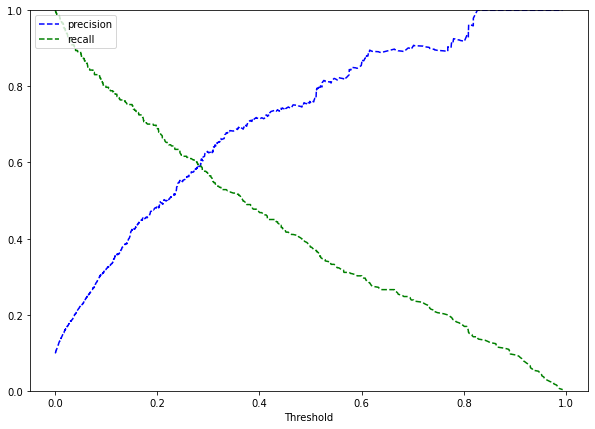

In [ ]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

**Observation:** Based on the precision-recall curve, the optimal threshold where precision equals to recall is around 0.28. However, because I want a higher recall score, I will choose 0.25 as the optimal threshold value, so I can have a better recall and still a good precision score. 

In [ ]:
# I am setting the new threshold value
optimal_threshold_new = 0.25

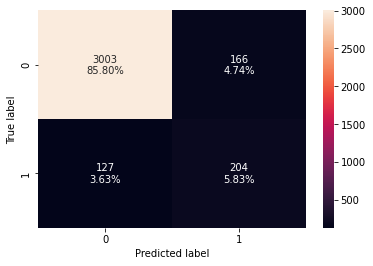

In [ ]:
# I am going to check model performance based on the new optimal threshold

confusion_matrix_loan(lg, X_train, y_train, threshold=optimal_threshold_new)

In [ ]:
log_reg_model_train_new = compute_metrics(lg, X_train, y_train, threshold=optimal_threshold_new)
print("Training performance:")
log_reg_model_train_new

Training performance:


,Accuracy,Recall,Precision,F1
0,0.916286,0.616314,0.551351,0.582026


**Observation:** Although the model performance got significantly improved compared to initial model, (Recall scores: 0.616 vs. 0.378), the improvement in the previous model with ROC-AUC was way better (Recall scores: 0.749 vs. 0.616)

##Comparing the model performances for Training Set##

In [ ]:
# Let's compare the three models based on training sets

models_train_compare = pd.concat([log_reg_model_train_perf.T, log_reg_train_new.T, log_reg_model_train_new.T,], axis=1)
models_train_compare.columns = [
    "Initial",
    "0.15 Threshold",
    "0.25 Threshold",
]

print("Training performance comparison:")
models_train_compare

Training performance comparison:


,Initial,0.15 Threshold,0.25 Threshold
Accuracy,0.930000,0.879429,0.916286
Recall,0.377644,0.749245,0.616314
Precision,0.762195,0.422487,0.551351
F1,0.505051,0.540305,0.582026


##Model Performance in Testing Set##

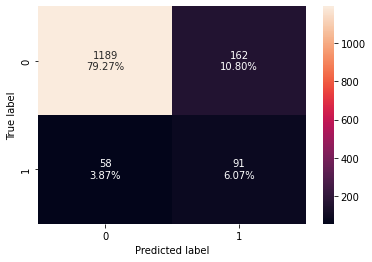

In [ ]:
# First, let's use the threshold of 0.15

confusion_matrix_loan(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
log_reg_model_test = compute_metrics(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)
print("Test set performance:")
log_reg_model_test

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.853333,0.610738,0.359684,0.452736


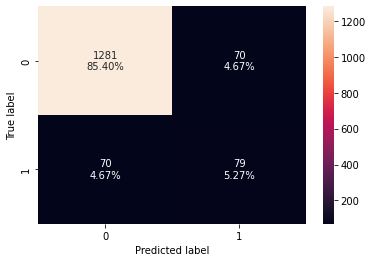

In [ ]:
# Second, let's use the threshold of 0.25

confusion_matrix_loan(lg, X_test, y_test, threshold=optimal_threshold_new)

In [ ]:
log_reg_model_test_new = compute_metrics(lg, X_test, y_test, threshold=optimal_threshold_new)
print("Test set performance:")
log_reg_model_test2

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.906667,0.530201,0.530201,0.530201


In [ ]:
models_test_compare = pd.concat([log_reg_model_test_perf.T, log_reg_model_test.T, log_reg_model_test_new.T,], axis=1)
models_test_compare.columns = [
    "Initial",
    "0.15 Threshold",
    "0.25 Threshold",
]

print("Training performance comparison:")
models_test_compare

Training performance comparison:


,Initial,0.15 Threshold,0.25 Threshold
Accuracy,0.926000,0.853333,0.906667
Recall,0.322148,0.610738,0.530201
Precision,0.827586,0.359684,0.530201
F1,0.463768,0.452736,0.530201


**DECISION:** Although the recall score showed much improvement in the model with the threshold value of 0.15 compared to initial model, I will pick the model with the threshold value of 0.25, because the difference between training and testing sets in terms of recall scores is much lower in that. The recall value in training set is 14 point higher than the recall value in testing set in the model with the threshold value of 0.15. On the other hand, the recall value in training set is 8 point higher than the recall value in testing set in the model with the threshold value of 0.25. It means that there is a higher probability that the former model has an overfitting problem, as the difference between training and testing data is higher. Therefore, I will go with the latter model, even though the improvement on recall score was lower compared the former model. 

#Decision Tree Model#

##Creating the functions to compute metrics and create confusion matrix##

In [ ]:
def model_perf_tree(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  
    recall = recall_score(target, pred)  
    precision = precision_score(target, pred)  
    f1 = f1_score(target, pred)  

    
    loan_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return loan_perf

In [ ]:
def confusion_matrix_tree(model, predictors, target):
    
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

##Building the Decision Tree Model and Checking its Performance##

In [ ]:
# First, we will create the decision tree model

model = DecisionTreeClassifier(criterion="gini", random_state=1) # There are other criterions as well, but gini is the most common and popular one, so we will use this.
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Then, we will check the performance of the model for the training set

decision_tree_perf_train = model_perf_tree(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


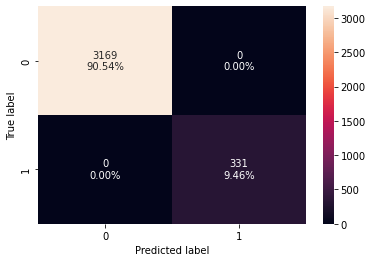

In [ ]:
confusion_matrix_tree(model, X_train, y_train)

In [ ]:
decision_tree_perf_test = model_perf_tree(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.944,0.630872,0.764228,0.691176


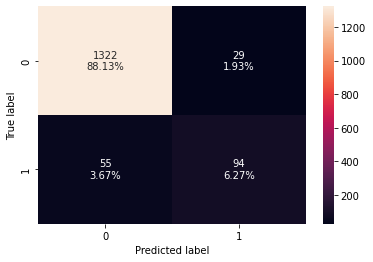

In [ ]:
confusion_matrix_tree(model, X_test, y_test)

**Observation:** The recall score of training set (i.e., 1) is dramatically higher than the recall score of testing set (i.e., 0.63). It means that our training set overfits. 

##Let's visualize the decision tree##

In [ ]:
feature_names = list(X.columns) #It returns all the predictors in the dataset
print(feature_names)

['Experience', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Mortgage_log', 'Family_sqrt', 'CCAvg_arcsin']


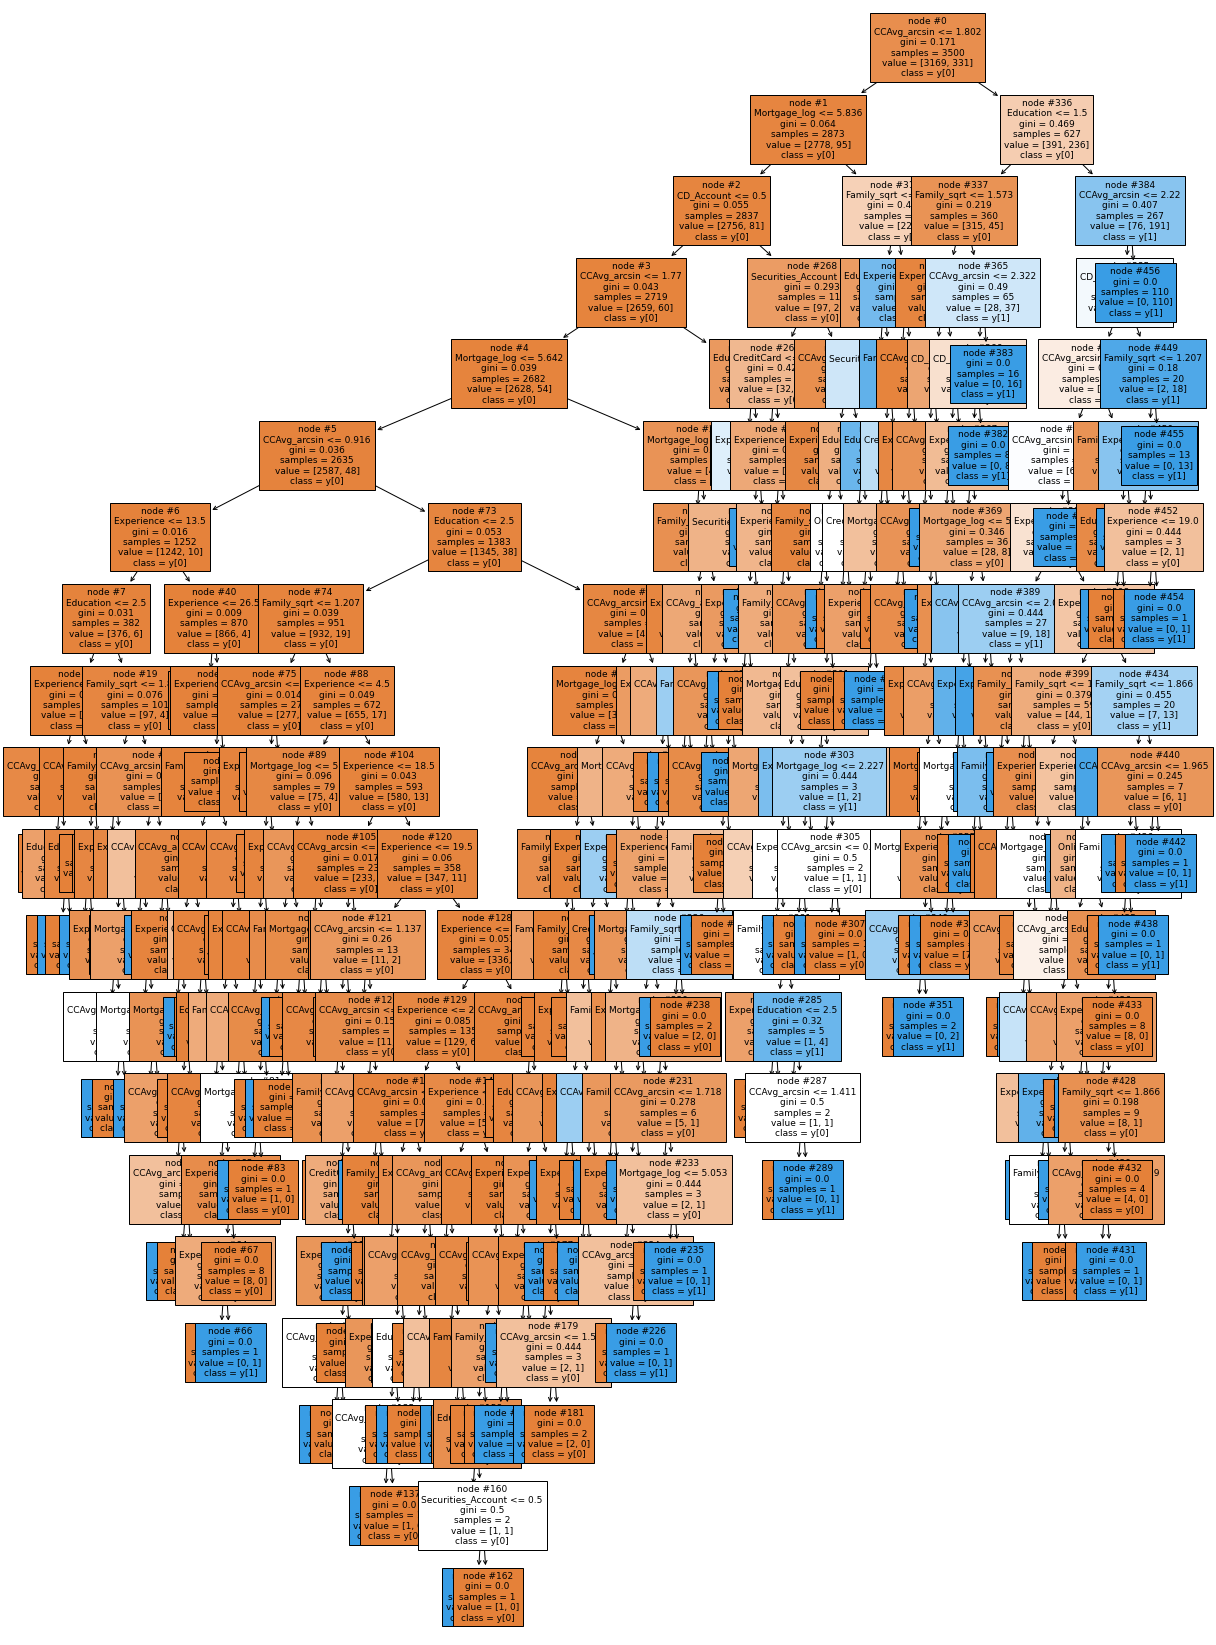

In [ ]:
plt.figure(figsize=(20,30))
tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=9, node_ids=True, class_names=True) 
plt.show()

#node_ids show the identification number of each node


**Observation:** Because I did not use any pruning technique, the decision tree model includes all potential nodes and leaves, so it captures not only the data but also all the noise, making the model highly overfitting.

##Let's find the importance of each feature##

In [ ]:
# Importance is also called Gini Importance and shows the extent of contribution of that feature to the prediction of outcome variable

print(pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
CCAvg_arcsin        0.422205
Education           0.214269
Family_sqrt         0.131609
Experience          0.104688
Mortgage_log        0.057310
CD_Account          0.033141
CreditCard          0.016823
Securities_Account  0.010723
Online              0.009233


**Observation:** One's average spending on credit cards monthly has the highest importance in the prediction of whether one will purchase the loan or not. On the other hand, whether a person uses online banking or not has the least importance. 

##Let's reduce overfitting##

In [ ]:
# We can set the max_depth of a decision tree to reduce overfitting. The default is that the tree grows until all the nodes are created. Restricting that grow can reduce overfitting.

model_restricted = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1) # We restrict max_depth to 3.
model_restricted.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

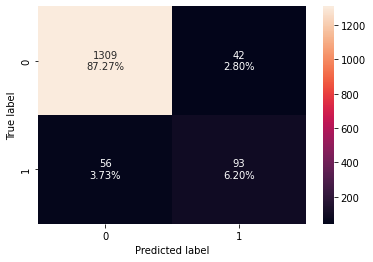

In [ ]:
confusion_matrix_tree(model_restricted, X_test, y_test)

In [ ]:
decision_tree_perf_test_restricted = model_perf_tree(model_restricted, X_train, y_train)
decision_tree_perf_test_restricted

,Accuracy,Recall,Precision,F1
0,0.942857,0.719033,0.689855,0.704142


In [ ]:
decision_tree_perf_test_restricted = model_perf_tree(model_restricted, X_test, y_test)
decision_tree_perf_test_restricted

,Accuracy,Recall,Precision,F1
0,0.934667,0.624161,0.688889,0.65493


**Observation:** Restricting max_depth to 3 has significantly decreased the discrepancy between the recall scores of training and testing set. However, we cannot be sure from this finding that this is the most optimal recall score that we can get in training set. That is why hyperparameter tuning is better than arbitrary decisions, because it automatically finds the best combination among a bunch of values in a bunch of parameters. It is also called pre-pruning, because we decide the complexity of tree from the very beginning, so the tree does not grow more than we want.  

##Hyperparameter Tuning##

In [ ]:
estimator = DecisionTreeClassifier(random_state=1)

# The parameters below will be used to choose the optimal values from each parameter

parameters = {'max_depth': np.arange(1,10),
              'splitter': ['best', 'random'], 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20], # Minimum number of leaf that will be included in the tree
              'max_leaf_nodes' : [2, 3, 5, 10], # Maximum number of nodes that will be included in the tree
              'min_impurity_decrease': [0.001,0.01,0.1], # Mimimum impurity decrease in each addition of a node
              'criterion': ['entropy', 'gini'], # Choosing the best criterion
              
             }

# We will use recall to compare parameter combinations, because recall is important for the specific problem statement of this project
acc_scorer = metrics.make_scorer(metrics.recall_score)

# GridSearch computes the optimum values and combinations

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

# This finds and fits the optimal algorithm to the data at hand.

estimator.fit(X_train, y_train)

NameError: ignored

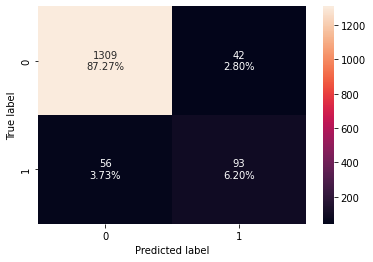

In [ ]:
# Let's create the confusion matrix based on hyperparameter tuning results

confusion_matrix_tree(estimator, X_test, y_test)

In [ ]:
decision_tree_perf_test_prepruned = model_perf_tree(estimator, X_train, y_train)
decision_tree_perf_test_prepruned

,Accuracy,Recall,Precision,F1
0,0.942857,0.719033,0.689855,0.704142


In [ ]:
decision_tree_perf_test_prepruned = model_perf_tree(estimator, X_test, y_test)
decision_tree_perf_test_prepruned

,Accuracy,Recall,Precision,F1
0,0.934667,0.624161,0.688889,0.65493


**Observation:** Recall did not change after hyperparameter tuning, meaning that my previous choice of max_depth=3 was already the optimal choice. Also, the model has become simpler, because other parameters resctricted the tree further. 

##Cost Complexity Pruning##

There is a second pruning option that can show us whether there is a better decision tree model with higher recall (and less discrepancy between training set and testing set in terms of recall scores). It is a post-pruning method called cost complexity pruning. As opposed the pre-pruning, post-pruning starts to prune the branches, leaves, and nodes of a complete tree. 

Cost complexity pruning is represented by ccp_alpha values which are about the weakest branch in the decision tree. As more node is removed, ccp_alpha value increases, so impurity increases. The important point is to prune the tree in a way that it will become simpler and capture the noise as minimum as possible, but at the same time, it will not become intolerably impure. Therefore, we need to find that sweet spot by pruning the nodes with the weakest link (the absence of which will not much contribute to the impurity).

In [ ]:
# The below is the scikit's codes to execute post pruning

clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
# As the tree is pruned further, ccp_alphas and impurity increase.

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000139,0.001112
2,0.000139,0.001669
3,0.000141,0.002233
4,0.000141,0.002797
5,0.000144,0.003951
6,0.000162,0.005084
7,0.000180,0.005626
8,0.000182,0.006720
9,0.000185,0.007275


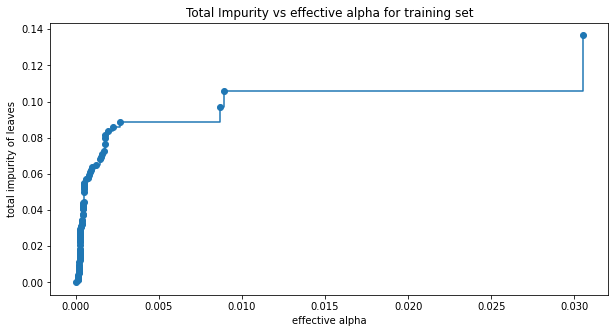

In [ ]:
# Let's show the increase above in a figure

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

**Observation:** We see a breaking point at around 0.0025, and that point may be the optimal value of effective alpha that we should set in further analysis.

In [ ]:
# I will use the effective alpha values I found to train a new decision tree

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03466715367613593


**Observation:** The effective alpha value in the last node is 0.034, meaning that the tree will be completely destroyed after that node.

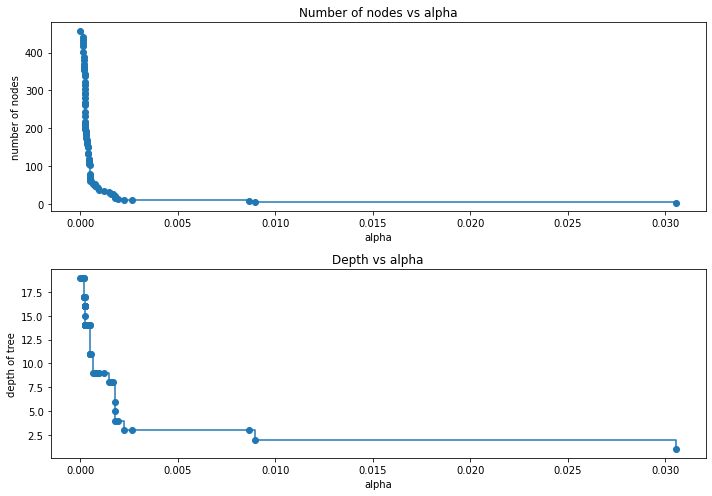

In [ ]:
# The code below will create the plots showing the relationship between number of nodes and alpha values and depth of the tree and alpha values

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Now, I will use the effective alpha scores on the new decision tree I created to see the relationship between accuracy and alpha scores in testing and training sets, so I can find the optimal value.

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

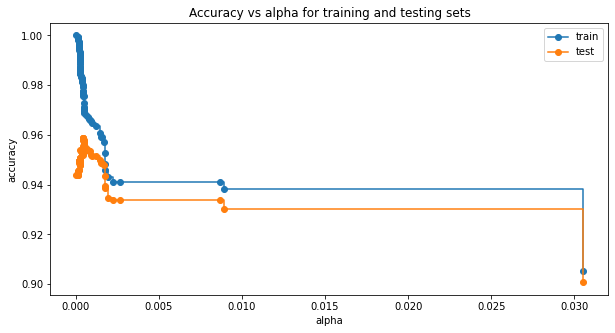

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Observation:** Again, the most important breaking point is at around the alpha value of 0.0025.

In [ ]:
# The code below computes the accuracy score of the model

index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.000457142857142857, random_state=1)
Training accuracy of best model:  0.9762857142857143
Test accuracy of best model:  0.9586666666666667


Next, because accuracy scores do not provide an accurate picture of the model fit, we should look at the recall scores to see if the post-pruned new decision tree fits well to the data.

In [ ]:
# Measuring recall for the training set

recall_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [ ]:
# Measuring recall for the testing set

recall_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


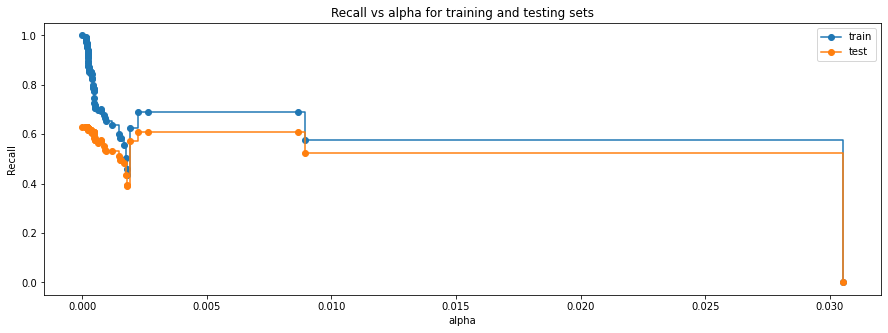

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

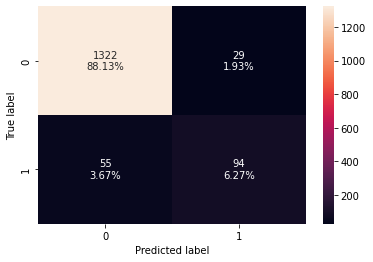

In [ ]:
confusion_matrix_tree(best_model,X_test, y_test)

In [ ]:
decision_tree_postpruned_perf_train = model_perf_tree(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
decision_tree_postpruned_perf_test = model_perf_tree(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.944,0.630872,0.764228,0.691176


**Observation:** The recall score in both training and testing set in the post-pruned tree is the same with the recall score in the initial tree before pre-pruning or post-pruning, so we can say that cost complexity pruning made the recall score remain same, but it made the tree simpler. 

##Decision on the best tree model##

 The best decision tree model was the one with hyperparameter tuning. Recall score in training set was 0.71, while it was 0.62 in training set. On the other hand, all other models predicted a recall score of 1 in training set, meaning overfitting. 

#Decision between Logistic Regression and Decision Tree Model#

Between the best model of logistic regression analysis and the best model of decision tree analysis, I would prefer the latter, because decision tree analysis with hypermeter tuning resulted in a higher recall score in both training set and testing set.

#Business Insights#

- One's average spending on credit cards monthly was the biggest predictor of the probability of one's purchasing the loan offered by the bank. Therefore, AllLife Bank should detect those customers and target them for offering the loan. Because average spending was found to be highly correlated with income, AllLife Bank can target the customers with high income as well.

- Education level was the second important predictor. AllLife Bank should target the customers with graduate degrees or advanced/professional degrees, because they tend to purchase loans more compared to the customers with undergraduate degree. Also, AllLife Bank can start promotions or find ways to attract people with graduate or advanced/professional degree and make them choose them.

- Next, AllLife Bank should target the customers with larger families, because they are more likely to purchase loan, possibly because they need money more or are more likely to have emergency. 

- Lastly, if a person has a certificate of deposit account with the bank, then they are more likely to purchase o loan.